# Project - Loan Predicition

Aansh Sagar

In [1]:
import pandas as pd 
import numpy as np                     
import seaborn as sns                  
import matplotlib.pyplot as plt  
%matplotlib inline 
import warnings  

In [2]:
data=pd.read_csv('train_ctrUa4K.csv')

In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
data.shape

(614, 13)

## Univariate Analysis:

In [5]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [6]:
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

* The loan of 422 people out of 614 was approved
* The approval rate is 68.73%

<AxesSubplot:>

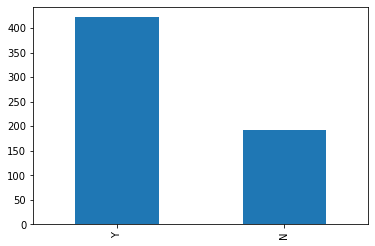

In [7]:
data['Loan_Status'].value_counts().plot.bar()

## Categorical Variables

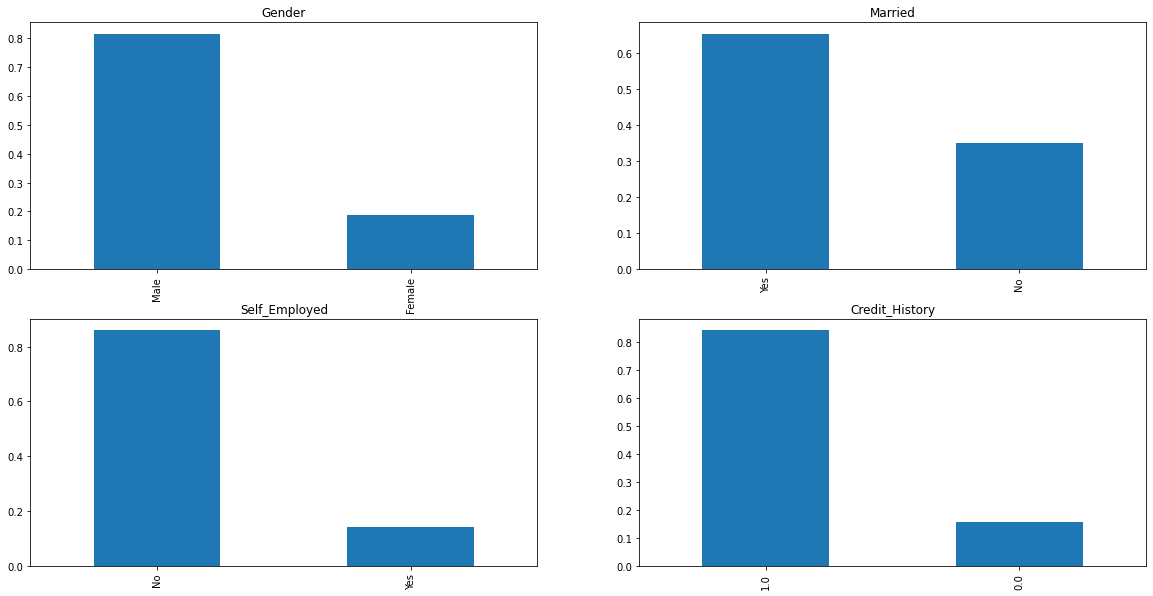

In [8]:
plt.figure(1) 
plt.subplot(221) 
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 
plt.subplot(222)
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(223)
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(224) 
data['Credit_History'].value_counts(normalize=True).plot.bar(title= 'Credit_History') 
plt.show()

It can be inferred from the above bar plots that:
* 80% applicants in the dataset are male.
* Around 65% of the applicants in the dataset are married.
* Around 15% applicants in the dataset are self employed.
* Around 85% applicants have repaid their debts.

## Ordinal Variables

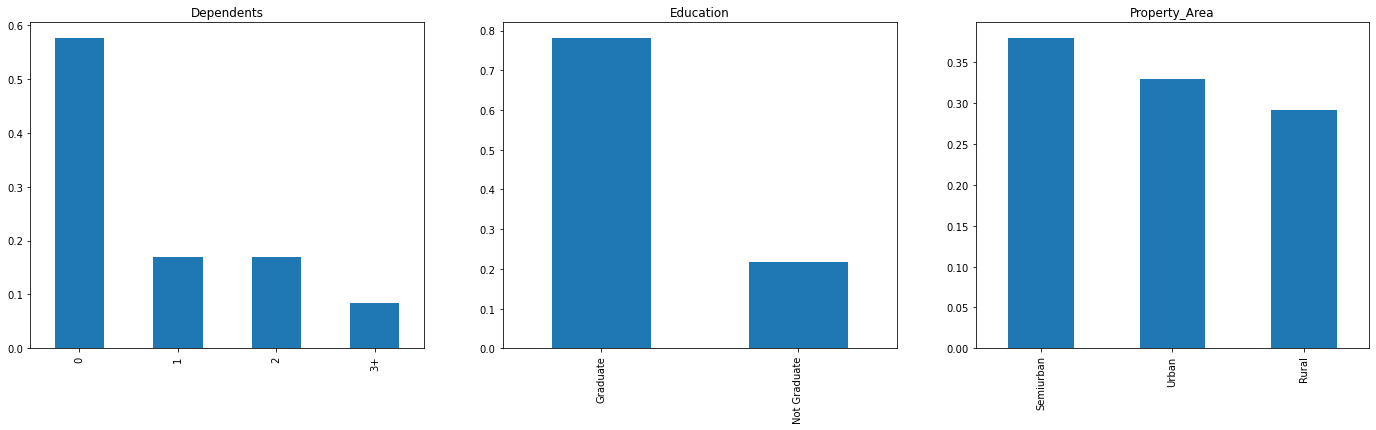

In [9]:
plt.figure(1) 
plt.subplot(1,3,1) 
data['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title= 'Dependents') 
plt.subplot(1,3,2)
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(1,3,3) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area') 
plt.show()

Following inferences can be made from the above bar plots:
* Most of the applicants don’t have any dependents.
* Around 80% of the applicants are Graduate.
* Most of the applicants are from Semiurban area.

## Numerical variables

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


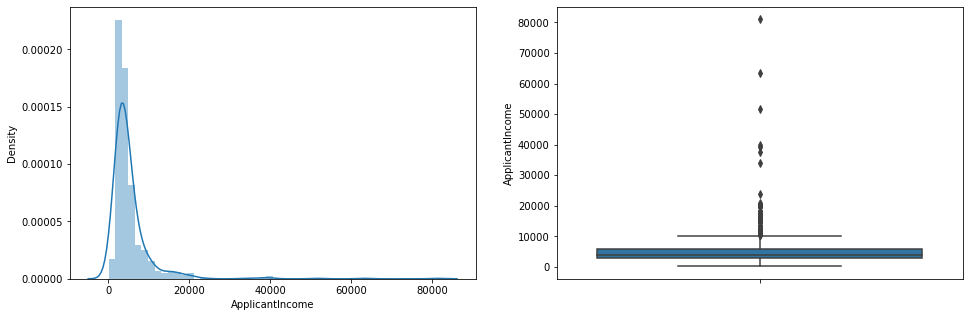

In [10]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(data['ApplicantIncome']); 
plt.subplot(1,2,2) 
sns.boxplot(y=data['ApplicantIncome'])
plt.show()

* It can be inferred that most of the data in the distribution of applicant income is towards __left__ which means it is __not normally distributed__. 
* The boxplot confirms the __presence of a lot of outliers__. This can be attributed to the __income disparity__ in the society

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Education'>

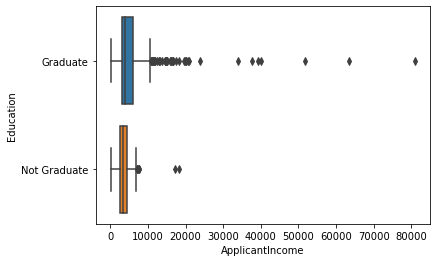

In [11]:
sns.boxplot(data['ApplicantIncome'],data['Education'])

We can see that there are a __higher number__ of graduates with very high incomes, which are appearing to be the __outliers__.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


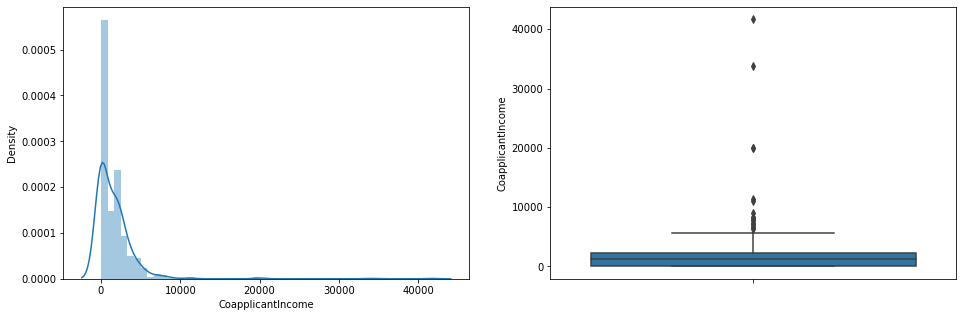

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(data['CoapplicantIncome']); 
plt.subplot(1,2,2) 
sns.boxplot(y=data['CoapplicantIncome'])
plt.show()

* Majority of coapplicant’s income ranges from __0 to 5000.__
* We also see a lot of outliers in the coapplicant income and it is __not normally distributed.__

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


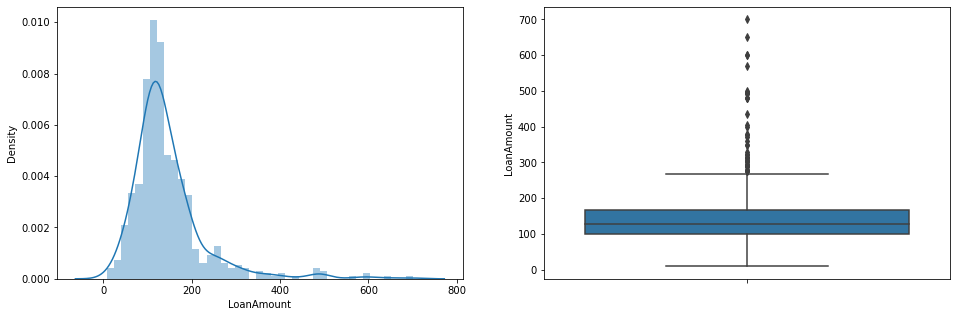

In [13]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1) 
sns.distplot(data['LoanAmount']); 
plt.subplot(1,2,2) 
sns.boxplot(y=data['LoanAmount'])
plt.show()

* Outliers are present 
* the distribution is fairly normal. 

## Bivariate Analysis

#### Categorical variable VS target variable

In [14]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender

Loan_Status,N,Y
Gender,,
Female,37,75
Male,150,339


<AxesSubplot:xlabel='Gender'>

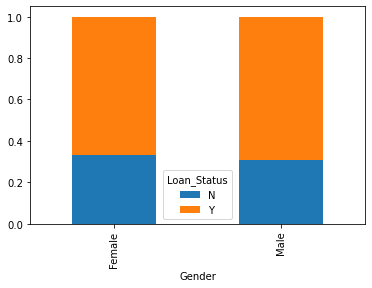

In [15]:
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)

* It can be inferred that the proportion of male and female applicants is more or less __same__ for both approved and unapproved loans.

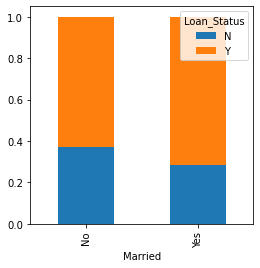

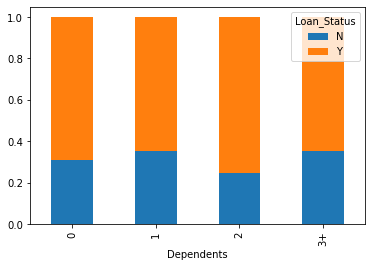

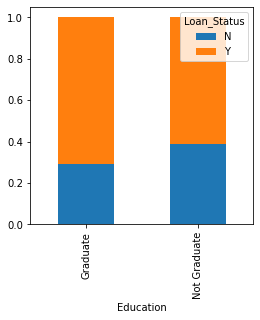

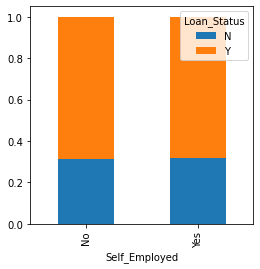

In [16]:
Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status']) 

Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()
Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show()
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

* Proportion of __married applicants__ is __higher__ for the approved loans.
* Distribution of applicants with __1 or 3+ dependents__ is __similar__ across both the categories of Loan_Status.
* There is __nothing significant__ we can infer from __Self_Employed vs Loan_Status plot.__

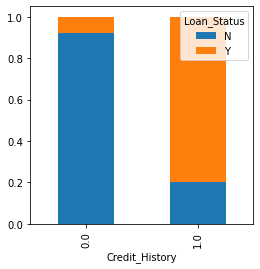

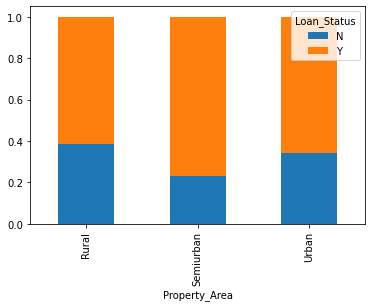

In [17]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status'])
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

* It seems people with __credit history as 1__ are __more likely__ to get their loans approved.
* Proportion of loans getting approved in __semiurban area__ is __higher__ as compared to that in rural or urban areas.

### Numerical Variable vs Target Variable

In [18]:
data.groupby('Loan_Status')['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

<AxesSubplot:xlabel='Loan_Status'>

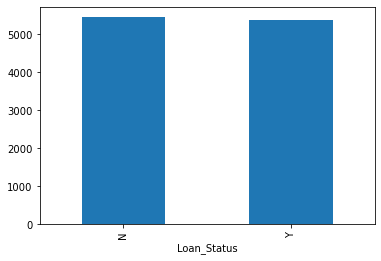

In [19]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

There is not visible difference between __the mean income__ of people for which the loan has been __approved__ vs the mean income of people for which the loan has __not been approved__ in the graph.

In [20]:
data['ApplicantIncome'].max()

81000

In [21]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high'] 
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)
data['Income_bin'].value_counts()

Average      226
High         143
Very high    137
Low          108
Name: Income_bin, dtype: int64

In [22]:
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
High,45,98
Very high,46,91


Text(0, 0.5, 'Percentage')

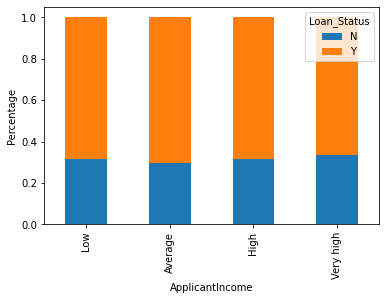

In [23]:
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

It can be inferred that __Applicant income__ __does not affect__ the chances of __loan approval__ 

In [24]:
bins=[0,1000,3000,42000] 
group=['Low','Average','High']
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
data['Coapplicant_Income_bin'].value_counts()

Average    222
High        97
Low         22
Name: Coapplicant_Income_bin, dtype: int64

In [25]:
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']) 
Coapplicant_Income_bin

Loan_Status,N,Y
Coapplicant_Income_bin,,
Low,3,19
Average,61,161
High,32,65


Text(0, 0.5, 'Percentage')

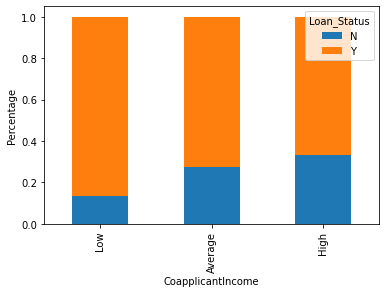

In [26]:
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

 * __coapplicant’s income__ is less , then the chances of loan approval are high.

Text(0, 0.5, 'Percentage')

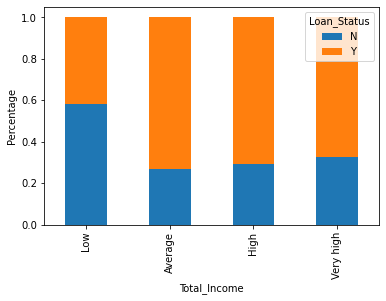

In [27]:
#new variable in which we will combine the applicant’s and coapplicant’s income t
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income') 
plt.ylabel('Percentage')

* Proportion of loans getting approved for applicants having __low Total_Income__ is __very less__ as compared to that of applicants with __Average, High and Very High Income.__

Text(0, 0.5, 'Percentage')

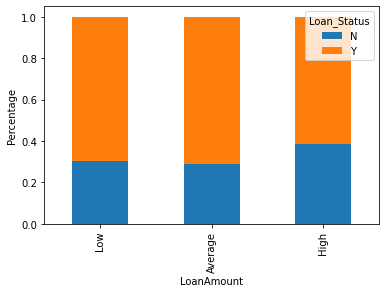

In [28]:
#Checking for the loan amount
bins=[0,100,200,700]
group=['Low','Average','High'] 
data['LoanAmount_bin']=pd.cut(data['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

* the proportion of approved loans is __higher__ for __Low and Average Loan Amount__ as compared to that of High Loan Amount

In [29]:
# drop the bins, change the 3+ in dependents variable to 3, convert the target variable’s categories into 0 and 1 

data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
data['Dependents'].replace('3+', 3,inplace=True) 
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

<AxesSubplot:>

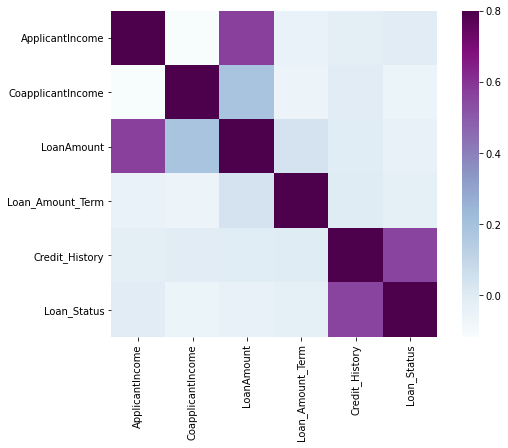

In [30]:
# heat map to visualize the correlation
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

* Highly correlated variables are __(ApplicantIncome - LoanAmount)__
*  Also __(Credit_History - Loan_Status).__ is higly correlated
* __LoanAmount__ is also correlated with __CoapplicantIncome.__

## Treating missing values and outliers:

In [31]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

In [32]:
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True) 
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

In [33]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [34]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

In [35]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [36]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Hence, The missing values are treated

<AxesSubplot:>

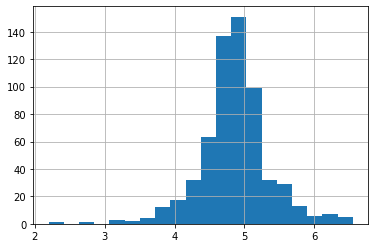

In [37]:
#log transformation
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20) 

The log transformation is, arguably, the most popular among the different types of transformations used to transform skewed data to approximately conform to normality. 

* the distribution looks much closer to normal and effect of extreme values has been significantly subsided. 

## Feature Engineering

In [38]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

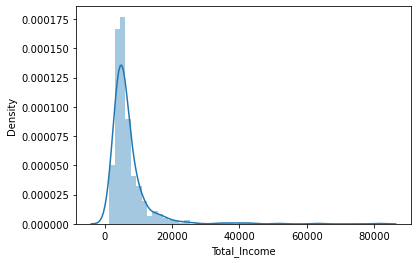

In [39]:
sns.distplot(data['Total_Income'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

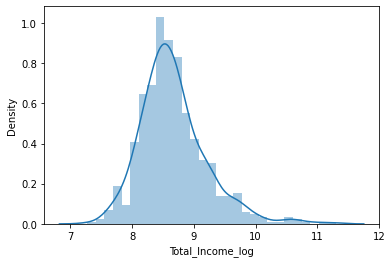

In [40]:
data['Total_Income_log'] = np.log(data['Total_Income']) 
sns.distplot(data['Total_Income_log'])

* After taking the log transformation to make the distribution normal.
* Now the distribution looks much closer to normal 

In [41]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term']

* calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EMI', ylabel='Density'>

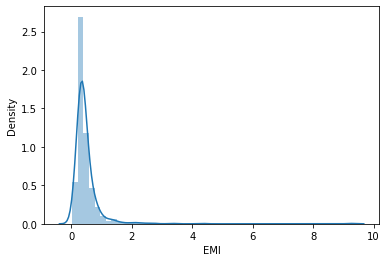

In [42]:
sns.distplot(data['EMI'])

In [43]:
data["EMI"]

0      0.355556
1      0.355556
2      0.183333
3      0.333333
4      0.391667
         ...   
609    0.197222
610    0.222222
611    0.702778
612    0.519444
613    0.369444
Name: EMI, Length: 614, dtype: float64

In [44]:
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)

* the income left after the EMI has been paid

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance Income', ylabel='Density'>

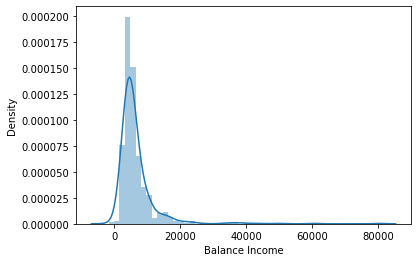

In [45]:
sns.distplot(data['Balance Income'])

In [46]:
data=data.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 

* drop the variables which we used to create these new features. 
* because the correlation between those old features and these new features will be very high
* removing correlated features will help in reducing the noise too.

In [47]:
data.drop(columns=['Loan_ID'],inplace=True)

Since the loan id column would be insignificant for our model

In [48]:
data=pd.get_dummies(data, drop_first=True)
data.head()

,Credit_History,Loan_Status,LoanAmount_log,Total_Income,Total_Income_log,EMI,Balance Income,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,1,4.852030,5849.0,8.674026,0.355556,5493.444444,1,0,1,0,0,0,0,0,1
1,1.0,0,4.852030,6091.0,8.714568,0.355556,5735.444444,1,1,0,1,0,0,0,0,0
2,1.0,1,4.189655,3000.0,8.006368,0.183333,2816.666667,1,1,1,0,0,0,1,0,1
3,1.0,1,4.787492,4941.0,8.505323,0.333333,4607.666667,1,1,1,0,0,1,0,0,1
4,1.0,1,4.948760,6000.0,8.699515,0.391667,5608.333333,1,0,1,0,0,0,0,0,1


In [49]:
data.shape

(614, 16)

# Model Building

In [53]:
x=data.drop('Loan_Status',1)
y=data['Loan_Status']

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [55]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier=DTC(class_weight='balanced')
classifier=DTC()

In [58]:
classifier.fit(x_train,y_train)
predicted_values=classifier.predict(x_test)

In [59]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted_values))

              precision    recall  f1-score   support

           0       0.54      0.55      0.55        38
           1       0.80      0.79      0.79        85

    accuracy                           0.72       123
   macro avg       0.67      0.67      0.67       123
weighted avg       0.72      0.72      0.72       123



## Hyperparameter Tuning

In [60]:
classifier=DTC()
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

In [61]:
from sklearn.metrics import f1_score

In [62]:
def calc_score(model,x1,x2,y1,y2):
    model.fit(x1,y1)
    predict=model.predict(x1)
    f1=f1_score(y1,predict)
    
    predict=model.predict(x2)
    f2=f1_score(y2,predict)
    
    return f1, f2

In [63]:
def effect(train_score, test_score, x_axis, title):
    plt.figure(figsize=(5,5),dpi=120)
    plt.plot(x_axis,train_score,color='red',label='train score')
    plt.plot(x_axis,test_score,color='blue',label='test score')
    plt.title(title)
    plt.legend()

In [86]:
maxdepth=[i for i in range(1,25)]
train=[]
test=[]

for i in maxdepth:
    model=DTC(class_weight='balanced', max_depth=i, random_state=42)
    f1,f2=calc_score(model,x_train,x_test,y_train,y_test)
    train.append(f1)
    test.append(f2)

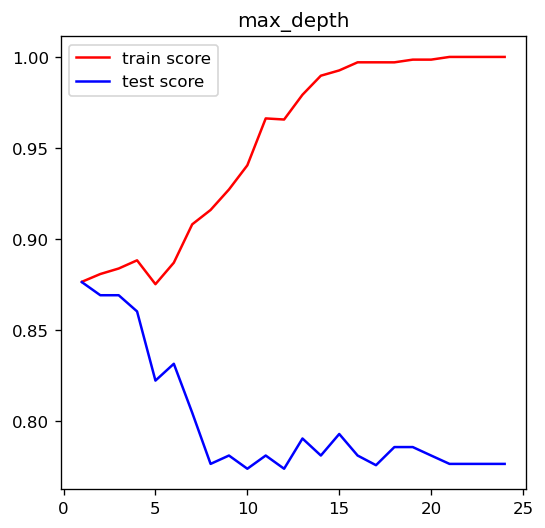

In [88]:
effect(train,test,range(1,25),'max_depth')

In [102]:
minsamples=[i for i in range(2,500,10)]
train=[]
test=[]

for i in minsamples:
    model=DTC(class_weight='balanced', min_samples_split=i, random_state=42)
    f1,f2=calc_score(model,x_train,x_test,y_train,y_test)
    train.append(f1)
    test.append(f2)

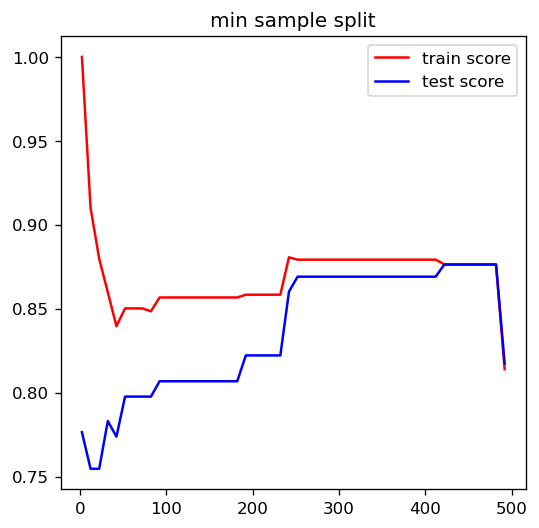

In [103]:
effect(train,test,range(2,500,10),'min sample split')

In [94]:
maxleafnodes=[i for i in range(2,100,5)]
train=[]
test=[]

for i in maxleafnodes:
    model=DTC(class_weight='balanced', max_leaf_nodes=i, random_state=42)
    f1,f2=calc_score(model,x_train,x_test,y_train,y_test)
    train.append(f1)
    test.append(f2)

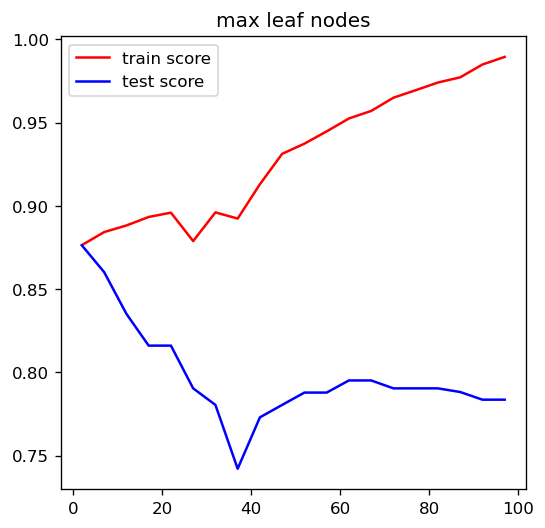

In [95]:
effect(train,test,range(2,100,5),'max leaf nodes')

In [104]:
minsampleleaf=[i for i in range(2,100,5)]
train=[]
test=[]

for i in minsampleleaf:
    model=DTC(class_weight='balanced', min_samples_leaf=i, random_state=42)
    f1,f2=calc_score(model,x_train,x_test,y_train,y_test)
    train.append(f1)
    test.append(f2)

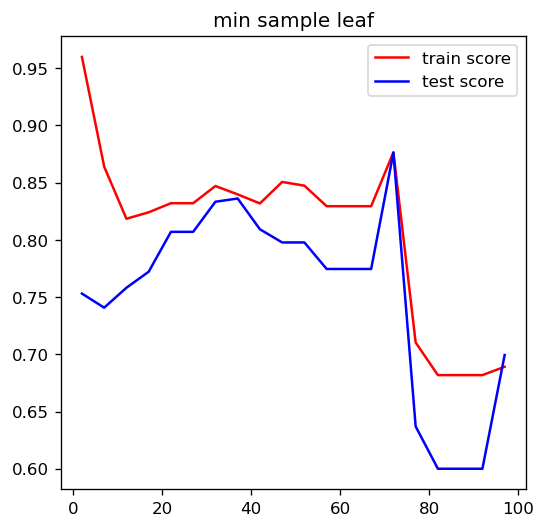

In [105]:
effect(train,test,range(2,100,5),'min sample leaf')

In [118]:
model=DTC()
model.fit(x_train,y_train)
feature_imp=pd.Series(model.feature_importances_,index=x.columns)
k=feature_imp.sort_values()

<BarContainer object of 15 artists>

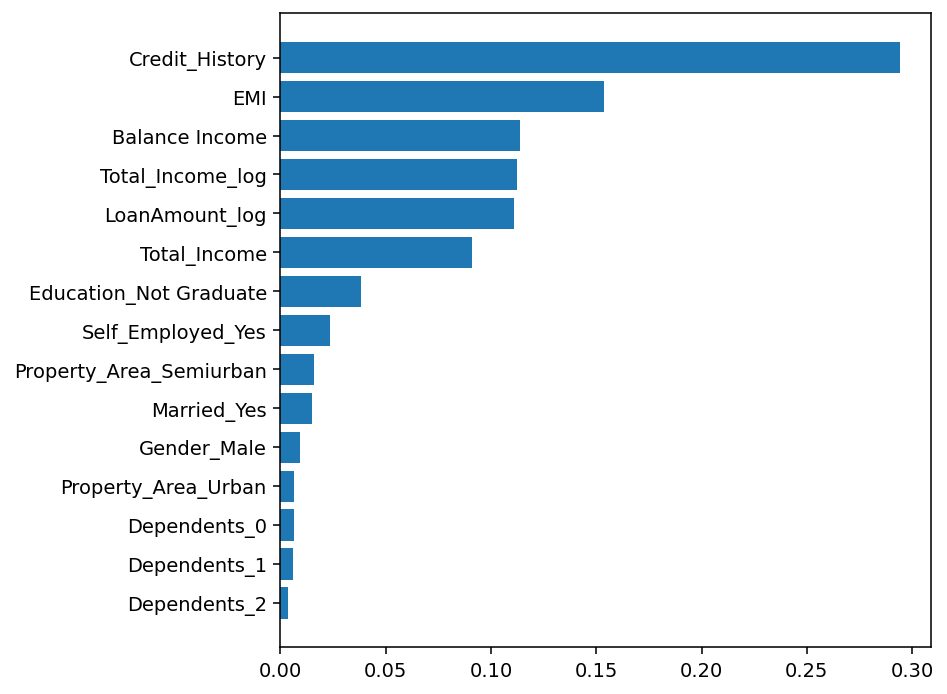

In [119]:
plt.figure(figsize=(6,6),dpi=140)
plt.barh(k.index,k)